# CapsNets on Mnist dataset

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

tf.__version__
%matplotlib inline

## Loading dataset and normalising

In [2]:
(X_train, y_train), (X_test , y_test) = tf.keras.datasets.mnist.load_data()
X_train = X_train / 255.0
X_train = tf.cast(X_train, dtype=tf.float32)
X_train = tf.expand_dims(X_train, axis=-1)

X_test = X_test / 255.0
X_test = tf.cast(X_test, dtype=tf.float32)
X_test = tf.expand_dims(X_test, axis=-1)

# Reducing the size of the samples for faster training
X_train = X_train[:1024]
y_train = y_train[:1024]

X_test = X_test[:512]
y_test = y_test[:512]

X_train.shape, y_train.shape

(TensorShape([1024, 28, 28, 1]), (1024,))

1024 images of size 28x28 over one channel

## Sample visualisation

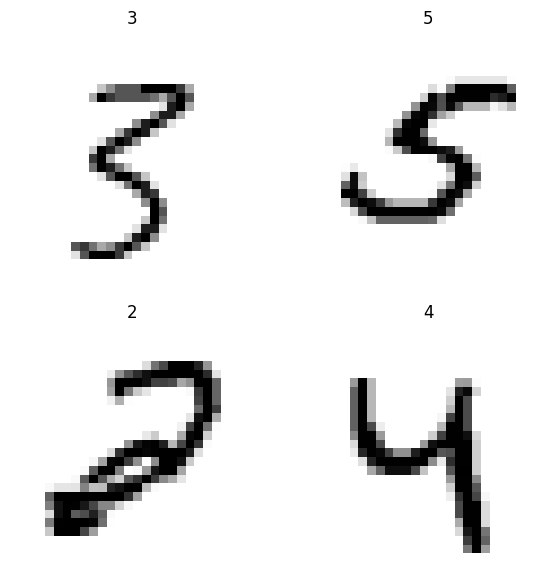

In [3]:
import random

plt.figure(figsize=(7, 7))
for i in range(4):
  ax = plt.subplot(2, 2, i + 1)
  rand_index = random.choice(range(len(X_train)))
  plt.imshow(X_train[rand_index], cmap=plt.cm.binary)
  plt.title(y_train[rand_index])
  plt.axis(False)

## Build CapsNet model

In [4]:
# Setting PATH to import CapsNet class from python file to notebook

import os
import sys
directory_path = os.path.abspath(os.path.join('../src'))
if directory_path not in sys.path:
    sys.path.append(directory_path)

from CapsNet import CapsNet

In [5]:
params = {
    "dataset": "MNIST",
    "input_shape": (28, 28, 1),
    "epochs": 10,
    "epsilon": 1e-7,
    "m_minus": 0.1,
    "m_plus": 0.9,
    "lambda_": 0.5,
    "alpha": 0.0005,
    "no_of_conv_kernels": 128,
    "no_of_primary_capsules": 32,
    "no_of_secondary_capsules": 10,
    "primary_capsule_vector": 8,
    "secondary_capsule_vector": 16,
    "r":3,
    "train_metrics": ['accuracy', 'precision', 'recall', 'f1']
}

model = CapsNet(**params)
model.compile()
model.summary()

Model: "caps_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  0 (unused)
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  0 (unused)
                                                                 
 dense (Dense)               multiple                  0 (unused)
                                                                 
 dense_1 (Dense)             multiple                  0 (unused)
                                                                 
 dense_2 (Dense)             multiple                  0 (unused)
                                                                 
Total params: 1,474,560
Trainable params: 1,474,560
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.fit(X_train, y_train, tf.keras.optimizers.Adam())

Epoch 10/10: 100%|██████████| 16/16 [00:06<00:00,  2.67it/s, Loss : 0.0002]


{'accuracy': ListWrapper([0.798828125, 0.9130859375, 0.9443359375, 0.970703125, 0.9833984375, 0.9912109375, 0.994140625, 0.9970703125, 0.998046875, 0.998046875]),
 'precision': ListWrapper([0.8179725315520696, 0.9166322579990593, 0.946260963038023, 0.9711771987584803, 0.9836249440680486, 0.991312677234528, 0.9942167802953878, 0.9971181832107843, 0.9980851715686274, 0.9980851715686274]),
 'recall': ListWrapper([0.798828125, 0.9130859375, 0.9443359375, 0.970703125, 0.9833984375, 0.9912109375, 0.994140625, 0.9970703125, 0.998046875, 0.998046875]),
 'f1': ListWrapper([0.7920329705296383, 0.9129398060937023, 0.9441663939313092, 0.9705539039102469, 0.9833799671630681, 0.9912181451157699, 0.994139593429072, 0.9970747057998188, 0.9980515311770161, 0.9980515311770161]),
 'loss': ListWrapper([0.0073394575, 0.0026687675, 0.0016306865, 0.0010883972, 0.0007640584, 0.0005545243, 0.00042189294, 0.00032633127, 0.00024782008, 0.00020118516])}

In [7]:
preds = model.predict(X_test)

## Loading and saving

INFO:tensorflow:Assets written to: ../saved_models/caps_net-MNIST/assets


INFO:tensorflow:Assets written to: ../saved_models/caps_net-MNIST/assets


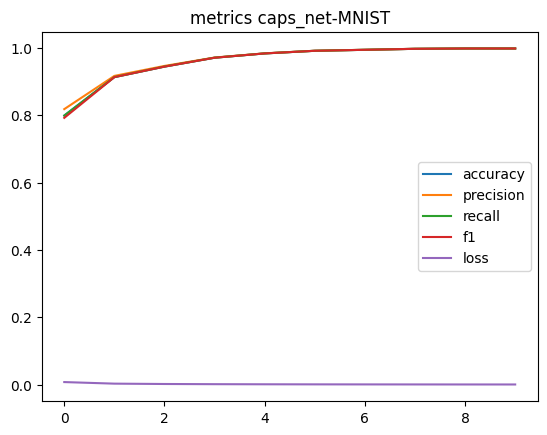

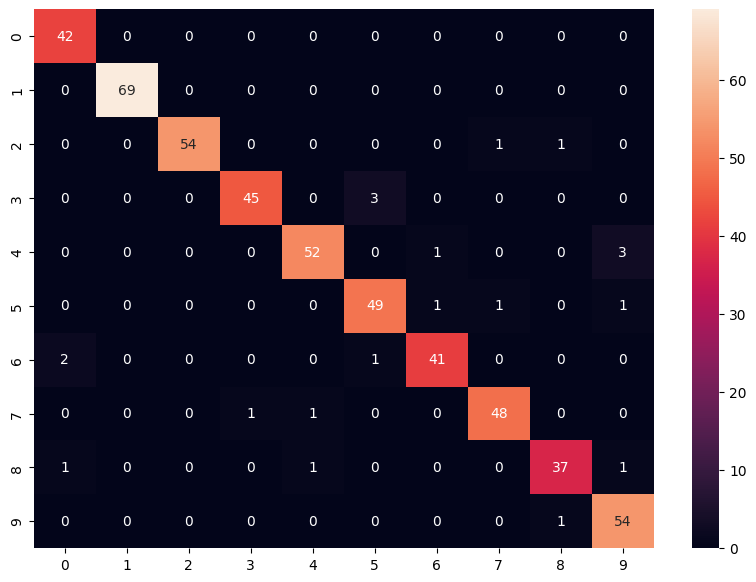

In [8]:
model.save(evaluate=(X_test, y_test), classes=np.arange(10))

In [10]:
loaded_model = tf.keras.models.load_model('../saved_models/caps_net-MNIST', custom_objects={'CapsNet': CapsNet})
loaded_model.compile()
loaded_model.summary()

Model: "caps_net"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 ConvolutionLayer (Conv2D)   multiple                  10496     
                                                                 
 PrimaryCapsule (Conv2D)     multiple                  2654464   
                                                                 
 dense (Dense)               multiple                  82432     
                                                                 
 dense_1 (Dense)             multiple                  525312    
                                                                 
 dense_2 (Dense)             multiple                  803600    
                                                                 
Total params: 5,550,864
Trainable params: 5,550,864
Non-trainable params: 0
_________________________________________________________________
